## Data Analysis of Itolizuma drug in Covid cases<a id='main'>

## Contents<a id='Contents'></a>
* [Data Analysis of Itolizuma drug in Covid cases](#main)
  * [Contents](#Contents)
    * [Import Libraries](#imports)
    * [Load Data](#load_data)
    * [Baseline Characetristics and demographics](#baseline_characteristics_demographics)
    * [Oxygen status at admission](#oxygen_status)
    * [SPO2 Levels pre-Ito, post-Ito and SPO2 at discharge](#spo2)
    * [Ferritin Levels pre-Ito, post-Ito and Ferritin at discharge](#ferritin)
    * [Lymphocyte Levels pre-Ito, post-Ito and values at discharge](#lymphocytes)
    * [Platelet counts pre-Ito, post-Ito and values at discharge](#platelets)
              
    * [Discussion](#discussion)
    * [Conclusion](#conclusion)

### Import Libraries<a id='imports'>

In [1]:
%matplotlib inline
#
# data manipulation and math
#
import numpy as np
import pandas as pd
#
# plotting
import matplotlib.pyplot as plt
import seaborn as sns
#

print("Loaded Libraries")
import warnings
warnings.filterwarnings('ignore')

Loaded Libraries


### Load Data<a id='load_data'>

In [2]:
df_xls = pd.read_excel('ito_covid_data_v_1.xlsx', index_col=0)  

In [3]:
df_xls.head()

,admission_date,patient_num,age_yrs,weight_kg,gender,fever,cough,sob,weakness,appetite_loss,...,lymphocyte_cnt_post_ito_2,lymphocyte_cnt_at_discharge,platelets_pre_ito_1,platelets_pre_ito_2,platelets_post_ito_1,platelets_post_ito_2,platelets_at_discharge,discharge_date,hospital_duration,is_dead
s_no,,,,,,,,,,,,,,,,,,,,,
1,2021-01-07,P1,58,75.0,M,NaN,NaN,Y,Y,NaN,...,12000.0,10800.0,2.9,3.6,4.0,4.1,4.2,2021-01-27,20,N
2,2021-01-07,P2,84,76.0,M,NaN,NaN,Y - GRADE 4,Y,NaN,...,19000.0,14000.0,2.6,2.1,3.3,3.3,3.3,2021-01-25,18,N
3,2021-01-14,P3,53,75.0,M,NaN,Y,Y - GRADE 4,NaN,NaN,...,9700.0,5800.0,2.8,2.6,1.8,1.8,2.8,2021-02-08,25,N
4,2021-01-09,P4,69,95.0,M,NaN,Y,Y - GRADE 4,NaN,NaN,...,14100.0,13000.0,3.7,NaN,3.3,3.3,NaN,2021-01-23,14,N
5,2020-11-20,P5,77,65.0,M,NaN,NaN,Y - GRADE 4,Y,NaN,...,17000.0,30100.0,1.9,2.0,1.9,1.6,6.0,2020-12-10,20,Y


In [4]:
df_xls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 1 to 13
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   admission_date                  13 non-null     datetime64[ns]
 1   patient_num                     13 non-null     object        
 2   age_yrs                         13 non-null     int64         
 3   weight_kg                       10 non-null     float64       
 4   gender                          13 non-null     object        
 5   fever                           4 non-null      object        
 6   cough                           7 non-null      object        
 7   sob                             13 non-null     object        
 8   weakness                        7 non-null      object        
 9   appetite_loss                   2 non-null      object        
 10  other_symptoms                  4 non-null      object        
 11  diabetes

In [6]:
df_xls.rename(columns = {'oxygen_status at_admission':'oxygen_status_at_admission'}, inplace = True)

In [5]:
df_xls.shape

(13, 68)

### Baseline Characetristics and demographics<a id='baseline_characteristics_demographics'>

<table>
    <caption><strong>Baseline Characetristics and demographics</strong></caption>
    <tr><th>&nbsp;</th><th>Variable(number/value)</th><th>Percentage</th></tr>
<tr><td>Total Number of patients</td><td>13</td><td>100</td></tr>
<tr><th>Age in years</th><th colspan="2">&nbsp;</th></tr>
<tr><td>Data Available</td><td>13</td><td>100</td></tr>
<tr><td>Mean <span>&#177;</span>SD</td><td>66.7<span>&#177;</span> 13</td><td>&nbsp;</td></tr>
<tr><td>Range (Min-Max) years</td><td>36 - 84</td><td>&nbsp;</td></tr>
<tr><th>Gender</th><th colspan="2">&nbsp;</th></tr>
<tr><td>Data Available</td><td>13</td><td>100</td></tr>
<tr><td>Male</td><td>11</td><td>85</td></tr>
<tr><td>Female</td><td>2</td><td>15</td></tr>
<tr><th>Weight in Kgs</th><th colspan="2">&nbsp;</th></tr>
<tr><td>Data Available</td><td>10</td><td>77</td></tr>
<tr><td>Mean <span>&#177;</span>SD</td><td>74<span>&#177;</span>11</td><td>&nbsp;</td></tr>
<tr><td>Range (Min-Max) kgs</td><td>52 - 95</td><td>&nbsp;</td></tr>
<tr><th>Symptoms and Comorbidities</th><th colspan="2">&nbsp;</th></tr>
<tr><th>Symptoms</th><th colspan="2">&nbsp;</th></tr>
<tr><td>Fever</td><td>4</td><td>30.77</td></tr>
<tr><td>Cough</td><td>7</td><td>53.85</td></tr>
<tr><td>Weakness</td><td>7</td><td>53.85</td></tr>
<tr><td>Appetite Loss</td><td>2</td><td>15.38</td></tr>
<tr><th>Other Symptoms</th><th>4</th><th>30.76</th></tr>
<tr><td>Body pain </td><td>1</td><td>7.69</td></tr>
<tr><td>Myalgia</td><td>1</td><td>7.69</td></tr>
<tr><td>Myalgia high grade fever with chills</td><td>1</td><td>7.69</td></tr>
<tr><td>High grade fever</td><td>1</td><td>7.69</td></tr>
<tr><th>Shortness of breath</th><th colspan="2">&nbsp;</th></tr>
<tr><td>Data Available</td><td>13</td><td>100</td></tr>
<tr><td>Y</td><td>6</td><td>46.15</td></tr>
<tr><td>Y- GRADE 4</td><td>7</td><td>53.84</td></tr>
<tr><th>Comorbidities</th><th colspan="2">&nbsp;</th></tr>
    <tr><td>Diabetes Melitus</td><td>8</td><td>61.5</td></tr>
    <tr><td>Hypertension</td><td>9</td><td>69.2</td></tr>
    <tr><td>Other Comobidities</td><td>1</td><td>7.69</td></tr>
</table>

### Oxygen status at admission<a id='oxygen_status'>

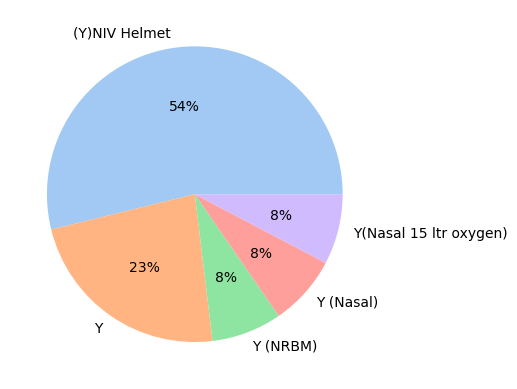

In [12]:
#define data
data =df_xls['oxygen_status_at_admission'].value_counts()
labels = df_xls['oxygen_status_at_admission'].value_counts().index

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

### SPO2 Levels pre-Ito, post-Ito and SPO2 at discharge<a id='spo2'>

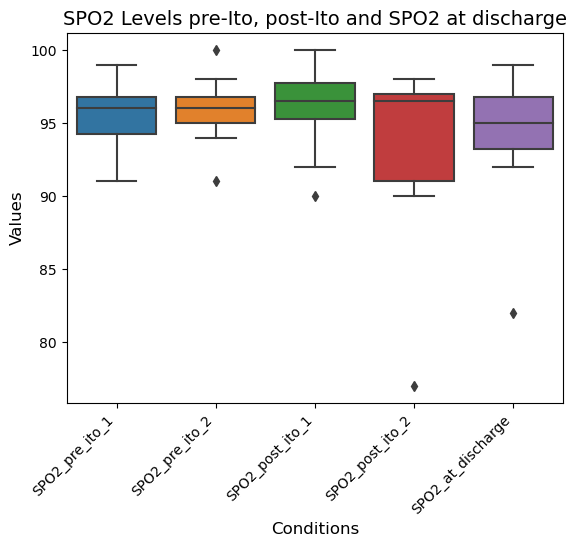

In [23]:
df = pd.DataFrame(data=df_xls, columns=["SPO2_pre_ito_1", "SPO2_pre_ito_2", "SPO2_post_ito_1","SPO2_post_ito_2","SPO2_at_discharge"])
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df))
boxplot.axes.set_title("SPO2 Levels pre-Ito, post-Ito and SPO2 at discharge", fontsize=14)
boxplot.set_xlabel("Conditions", fontsize=12)
plt.xticks(rotation=45, ha='right')
boxplot.set_ylabel("Values", fontsize=12)
plt.show()

### Ferritin Levels pre-Ito, post-Ito and Ferritin at discharge<a id='ferritin'>

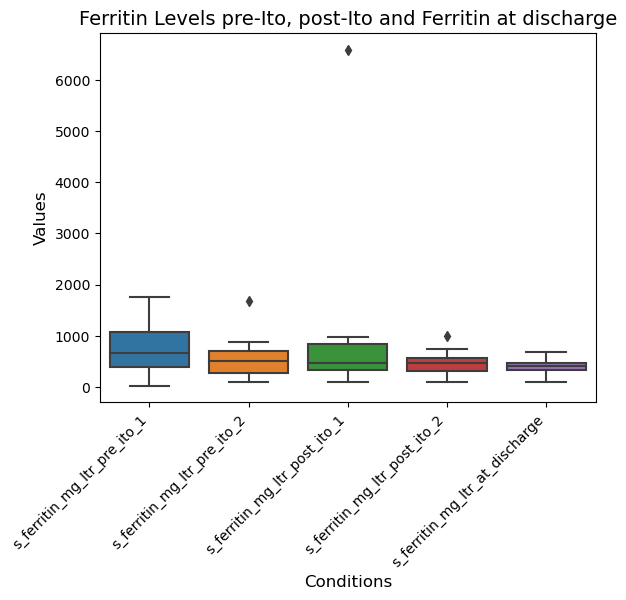

In [21]:
df_ferritin = pd.DataFrame(data=df_xls, columns=["s_ferritin_mg_ltr_pre_ito_1", "s_ferritin_mg_ltr_pre_ito_2", "s_ferritin_mg_ltr_post_ito_1","s_ferritin_mg_ltr_post_ito_2","s_ferritin_mg_ltr_at_discharge"])
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df_ferritin))
boxplot.axes.set_title("Ferritin Levels pre-Ito, post-Ito and Ferritin at discharge", fontsize=14)
boxplot.set_xlabel("Conditions", fontsize=12)
plt.xticks(rotation=45, ha='right')
boxplot.set_ylabel("Values", fontsize=12)
plt.show()

In [24]:
#displaying ferritin values
df_ferritin

,s_ferritin_mg_ltr_pre_ito_1,s_ferritin_mg_ltr_pre_ito_2,s_ferritin_mg_ltr_post_ito_1,s_ferritin_mg_ltr_post_ito_2,s_ferritin_mg_ltr_at_discharge
s_no,,,,,
1,614.0,520.0,386.0,391.0,315.8
2,967.0,NaN,469.0,469.0,423.0
3,1004.8,NaN,866.0,992.0,688.0
4,112.0,96.2,96.2,NaN,NaN
5,653.0,93.4,110.0,100.0,100.0
6,NaN,NaN,756.0,NaN,NaN
7,406.0,462.0,NaN,NaN,NaN
8,319.0,NaN,NaN,NaN,NaN
9,1500.0,NaN,6588.0,731.0,NaN


### Lymphocyte Levels pre-Ito, post-Ito and values at discharge<a id='lymphocytes'>

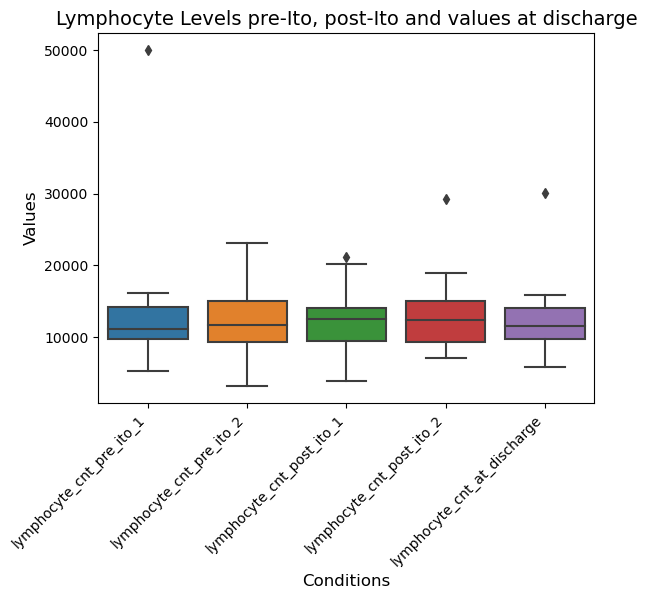

In [28]:
df_lymphocytes = pd.DataFrame(data=df_xls, columns=["lymphocyte_cnt_pre_ito_1", "lymphocyte_cnt_pre_ito_2", "lymphocyte_cnt_post_ito_1","lymphocyte_cnt_post_ito_2","lymphocyte_cnt_at_discharge"])
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df_lymphocytes))
boxplot.axes.set_title("Lymphocyte Levels pre-Ito, post-Ito and values at discharge", fontsize=14)
boxplot.set_xlabel("Conditions", fontsize=12)
plt.xticks(rotation=45, ha='right')
boxplot.set_ylabel("Values", fontsize=12)
plt.show()

In [29]:
df_lymphocytes

,lymphocyte_cnt_pre_ito_1,lymphocyte_cnt_pre_ito_2,lymphocyte_cnt_post_ito_1,lymphocyte_cnt_post_ito_2,lymphocyte_cnt_at_discharge
s_no,,,,,
1,9800.0,11700.0,13700.0,12000.0,10800.0
2,16000.0,18100.0,21100.0,19000.0,14000.0
3,12500.0,11700.0,9700.0,9700.0,5800.0
4,10000.0,14000.0,11300.0,14100.0,13000.0
5,50000.0,23100.0,20200.0,17000.0,30100.0
6,11300.0,11500.0,11500.0,29300.0,15900.0
7,9800.0,11800.0,14400.0,14400.0,14000.0
8,11100.0,9500.0,13900.0,11200.0,12000.0
9,NaN,4000.0,3900.0,7100.0,11000.0


### Platelet counts pre-Ito, post-Ito and values at discharge<a id='platelets'>
   

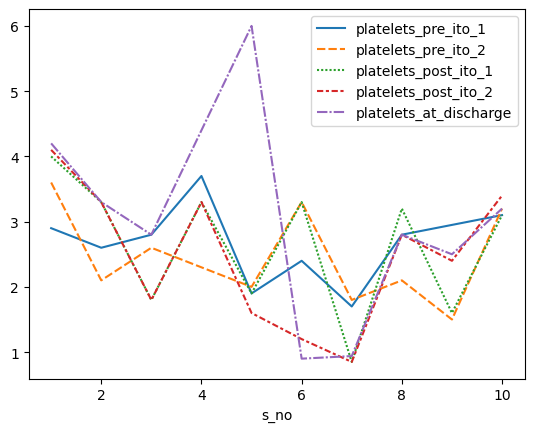

In [30]:
df_platelets = pd.DataFrame(data=df_xls, columns=["platelets_pre_ito_1", "platelets_pre_ito_2", "platelets_post_ito_1","platelets_post_ito_2","platelets_at_discharge"])
p = sns.lineplot(data = df_platelets)
plt.show()

### Discussion<a id='discussion'>

In [ ]:
### details needed

### Conclusion<a id='conclusion'>

In [31]:
### details needed